### Customer Segmentation (30 marks)

In this segment, we will try to segment the customers based on various features and later will try to profile the segments, which we will be presenting to the FREECELL team.

To perfrom KMean Clustering, we will not be using all the columns. According to the marketing team they wanted to target customers based on the number of calls made by the customer. Accodingly they may create plans and offers that will help them to launch themselves in the market.


1. Data Preparation (4 marks)
    - Filter the data and keep only the following columns: total day calls, total night calls, total eve calls, total intl calls (4 marks)
    - Perfrom Min-Max scaling on the data

2. Performing KMeans (16 marks)
    - Check Silhouette Curve (4 marks)
    - Check Elbow Curve (4 marks)
    - Run KMeans with final value of K (4 marks)
    - Assign the labels back to the original data
    - Plot scatter plot to visulize the clusters (4 marks)

3. Cluster Profiling (10 marks)
    - Check the average of various features to understand the properties of various groups
    - Write your inferences using the results generated. (10 marks)
 

In [1]:
# supress warnings
import warnings
warnings.filterwarnings('ignore')

# Importing all required packages
import numpy as np
import pandas as pd

# Data viz lib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from matplotlib.pyplot import xticks

In [2]:
# Read the file

cluster = pd.read_csv('telcom.csv')    #Add code here

# Check top-5 rows
cluster.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [3]:
# Analysis-1.1
# Filter the cluster dataframe and keep only the following columns: total day calls, total night calls, total eve calls, total intl calls
# The filtered data frame should only have 4 columns as mentioned above

# Write your code here
# Hint: https://stackoverflow.com/a/48198034
cluster = cluster[['total day calls', 'total night calls', 'total eve calls', 'total intl calls']]
cluster

,total day calls,total night calls,total eve calls,total intl calls
0,110,91,99,3
1,123,103,103,3
2,114,104,110,5
3,71,89,88,7
4,113,121,122,3
...,...,...,...,...
3328,77,83,126,6
3329,57,123,55,4
3330,109,91,58,6
3331,105,137,84,10


In [4]:
cluster.info() #Checking for null values, Data type and shape of new data frame.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   total day calls    3333 non-null   int64
 1   total night calls  3333 non-null   int64
 2   total eve calls    3333 non-null   int64
 3   total intl calls   3333 non-null   int64
dtypes: int64(4)
memory usage: 104.3 KB


In [5]:
# Analysis-1.2
# Here we need to scale the cluster data as created in the previous step
# We will be using min-max scaler
# You are not required to write any code over here
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

cluster_scale = scaler.fit_transform(cluster)


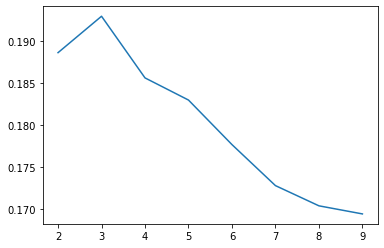

In [6]:
# Analysis-2.1
# Here you need to check the silhouette curve
# Here you don't need to write any code
# Mention your inference about the plot

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns

sse_ = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k).fit(cluster_scale)
    sse_.append([k, silhouette_score(cluster_scale, kmeans.labels_)])
plt.plot(pd.DataFrame(sse_)[0], pd.DataFrame(sse_)[1])

- **Explain the above generate plot**
- **Exlain what is silhouette score and how it's useful in the KMean process?**

### Answer : 

### Above plot is a silhouette method plot which is used to determine the value of 'k' while doing the clustering.


### The silhouette Method is also a method to find the optimal number of clusters and interpretation and validation of consistency within clusters of data.

### So, we calculate first the a(i) or the minimum distance. a(i) represents the cohesion inside the clusters. i.e all the distances in a cluster from the centre.
### Then we calculate b(i) which is the average distance of that point with all the points in the closest cluster to its cluster. or we can say inter-cluster distance between the sample and the next nearest cluster.


### Silhouette coefficient/score(si) = (bi –ai) / max (ai, bi) 

### Plotting the Silhouette scores on a curve shows that K gives the highest Silhouette score. So, we look at various

### Silhouette scores for different choices of K.

### The X axis of this plot refers to the number of clusters(k) and the Y axis is silhouette score.

### The peak with the highest value becomes the value of K for clustering.

## Here we can see that the value of 'k' is 3.

## Silhouette scores helps in Selecting optimal number of clusters in KMeans Algorithm(Silhouette Score) .  Its a neat way to find out the optimum value for k during k-means clustering. Silhouette values lies in the range of [-1, 1]. A value of +1 indicates that the sample is far away from its neighboring cluster and very close to the cluster its assigned. Similarly, value of -1 indicates that the point is close to its neighboring cluster than to the cluster its assigned. And, a value of 0 means its at the boundary of the distance between the two cluster. Value of +1 is idea and -1 is least preferred. Hence, higher the value better is the cluster configuration.

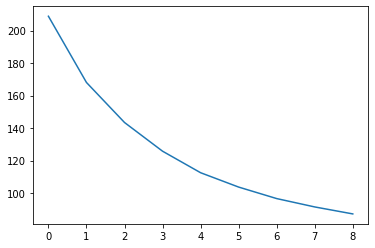

In [7]:
# Analysis-2.2
# Here you need to check the elbow curve
# Here you don't need to write any code
# Mention your inference about the plot

ssd = []
for num_clusters in list(range(1,10)):
    model_clus = KMeans(n_clusters = num_clusters)
    model_clus.fit(cluster_scale)
    ssd.append(model_clus.inertia_)

plt.plot(ssd)

- **Explain the above generate plot**
- **Exlain what is Elbow Curve and how it's useful in the KMean process?**

### The above plot is a Elbow method plot . It basically looks at the inertia which represents the distance from a data point from it clusters centre. So, as the number of clustering increases, the inertia will [keep decreasing, so in an extreme case, if every point is a cluster. then the inertia value is zero, because the point itself is the centre.

### If there is no meaningful decline in inertia, that is no meaningful decline in the average distance between the centre and the point. And that is the definition of elbow method.

### If we want to check that value of cluster, value of K or the number of clusters where the decline in your inertia is not significant enough. So, that's a visual thing, which is represented by the plot above. Meaning this shape makes an elbow, like your arm. It makes an elbow, it breaks there. So, there's a steep decline here, so we can make sense to proceed, but then there's a sudden flattering, like an elbow shape is formed. So, it tells us that "3" is the optimum value of clusters.

### The X axis of this plot refers to the number of clusters(k) and the Y axis is inertia/distortion.

## The cluster where the plot has a bend defines the total number of clusters.

## Here we can see that the optimal number of clusters is "3".

## To determine the optimal number of clusters, we have to select the value of k at the “elbow” ie the point after which the distortion/inertia start decreasing in a linear fashion.





In [8]:
# Analysis-2.3
# Here we need to run the final KMean clustering based on the value of K as chosen by you

# Write your code here
# use random_state=0
# Use the data "cluster_scale"

from sklearn.cluster import KMeans
cluster_kmean = KMeans(n_clusters=3,max_iter=1000,random_state=0)
fitClusters = cluster_kmean.fit_predict(cluster_scale)


In [9]:
# Analysis-2.4
# Here we will be assigning the labels generated through k-mean clustering to the original dataframe: 'cluster'
cluster['labels'] = cluster_kmean.labels_

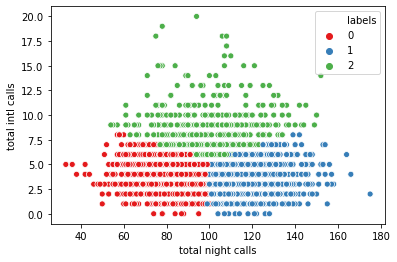

In [10]:
# Analysis-2.5
# Here we need to visulize the cluster as formed by the algorithm
sns.scatterplot(x='total night calls',y='total intl calls',hue='labels',legend='full',data= cluster, palette = 'Set1')

# Write your inferences about the plot generated

**Explain the plot**


From the above plot we see 3 clusters getting generated from the clustering algorithm of K means.

K-means algorithm divides the given n data points into 'K' groups(here 3) based on feature similarity .K-means clustering is a kind of unsupervised learning, which is used when we have unlabeled data. The measure of similarity over here is Euclidean distances. It uses the concept of the 'centroid' to create K clusters. 

The above plot is created taking 'total night calls' as x axis and 'total intl calls' as y axis.

In cluster 0(Red): The total number night calls range between 20 - 100 while the total number of international calls range between 0 - 9.

In cluster 1(Blue): The total number night calls range between between 90 and 180 while the total number of international calls range between 0 - 9.

In cluster 2(Green): The total number night calls range between between 50 - 150 while the total number of international calls range between 5 - 20

The density of calls is approximately same here.

Cluster 0 and Cluster 1 has the low number of total international calls.

Cluster 2 has the max number of total international calls.

Cluster 2 has maximum number of international and night calls.

In [11]:
# Analysis-3.1
# Here we will be checking the cluster mean for various cluster generated
cluster.groupby('labels').mean()

,total day calls,total night calls,total eve calls,total intl calls
labels,,,,
0,100.893731,83.096330,98.987768,3.571101
1,100.041789,116.441349,101.230938,3.550587
2,100.341906,100.065053,100.039334,8.193646


In [12]:
# Analysis-3.2
# Here you are required to explain the results generated above
# Explain various clusters and their properties

# Write 2 inferences about each cluster and its property


Below is the explanation  of various clusters properties and inferences related to each one of them:

Cluster 0(Red):

1. The total number night calls range between 20 - 100 while the total number of international calls range between 0 - 9.
2. Low number of average total international calls.
3. Average total day calls is 100.89
4. Average total night calls is 83.09
5. Average total evening calls is 98.98
6. Average total international calls is 3.57

Inference for Cluster 0 : 
1. Customers of this cluster 0 is are making maximum calls in a day which 100.89.
2. Average total night calls, Average total eve calls and Average total intl calls is lesser in this cluster 
3. We need to focus on making campaigns and plans to increase the international calls for these customers.



Cluster 1(Blue):

1. The total number night calls range between between 90 and 180 while the total number of international calls range between 0 - 9.
2. Average total day calls is 100.04
3. Average total night calls is 116.44
4. Average total evening calls is 101.23
5. Average total international calls is 3.55

Inference for Cluster 1 : 
1. Customers of this  cluster 1 is are making maximum night calls with a average of 116.44.
2. Customers of this  cluster 1 is are making low international calls with a average of 3.55.
3. We need to focus on making campaigns and plans to increase the international calls for these customers.



In Cluster 2(Green)

1. The total number night calls range between between 50 - 150 while the total number of international calls range between 5 - 20.
2. Average total day calls is 100.34
3. Average total night calls is 100.06
4. Average total evening calls is 100.03
5. Average total international calls is 8.19

Inference for Cluster 2 : 
1. This is the most suitable and revenue making cluster of customers.
2. Customers of this  cluster 2 is making high number of Average total night calls, Average total eve calls and Average total intl calls.
3. The Average international call is high.
4. We need to focus on these customer so they do not leave the telecom operator.